In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plot
import seaborn as sns
from sklearn.datasets import load_boston
%matplotlib inline

In [18]:
df_boston= load_boston()

In [19]:
print(df_boston.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

In [20]:
df_boston_new=pd.DataFrame(df_boston.data, columns= df_boston.feature_names)
df_boston_new.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [24]:
target=pd.DataFrame(df_boston.target, columns=['MEDV'])
target.head()

,MEDV
0,24.0
1,21.6
2,34.7
3,33.4
4,36.2


<AxesSubplot:>

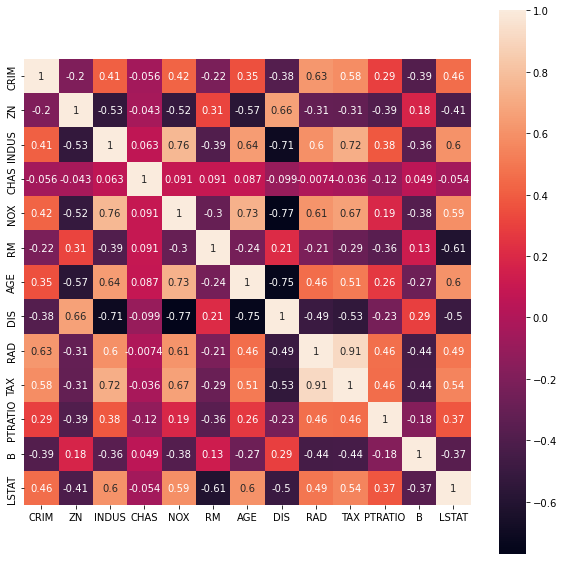

In [27]:
correlation=df_boston_new.corr()
plot.figure(figsize=(10,10))
sns.heatmap(data=correlation, annot=True, square=True)

* tax and rad are highly correlated fetaure 

In [28]:
# making linear regression model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
x_train,x_test,y_train,y_test=train_test_split(df_boston_new,target, random_state=1)
print(x_train.shape)
print(x_test.shape)

(379, 13)
(127, 13)


In [199]:
linreg=LinearRegression()
linreg.fit(x_train,y_train)
y_pred=linreg.predict(x_test)
r2_lin=metrics.r2_score(y_test,y_pred)
print(r2_lin)

0.7789410172622858


In [35]:
from sklearn.model_selection import cross_val_score
cv= cross_val_score(estimator=linreg, X =x_train, y=y_train,cv=10)
print(cv.mean())

0.6764932429312


# Polynomial regression

In [210]:
from sklearn.preprocessing import PolynomialFeatures
poly_reg=PolynomialFeatures(degree=2)
x_poly=poly_reg.fit_transform(x_train)
poly_reg.fit(x_poly,y_train)
reg_poly=LinearRegression()
reg_poly.fit(x_poly,y_train)
y_pred_poly= reg_poly.predict(poly_reg.fit_transform(x_test))
r2_poly=metrics.r2_score(y_test,y_pred_poly)
print(r2_poly)

0.7440976229951333


In [211]:
cv_poly=cross_val_score(estimator=reg_poly, X=x_train,y=y_train,cv=10)
print(cv_poly.mean())

0.6764932429312


## Ridge regression

In [200]:
from sklearn.linear_model import Ridge
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
steps=[
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures()),
    ('model', Ridge(alpha=20.5, fit_intercept=True))
]
ridge_pipe=Pipeline(steps)
ridge_pipe.fit(x_train,y_train)
y_pred_ridge=ridge_pipe.predict(x_test)
r2_ridge=metrics.r2_score(y_test,y_pred_ridge)
print(r2_ridge)

0.9104470273872024


In [201]:
cv_ridge=cross_val_score(estimator=ridge_pipe,X=x_train,y=y_train, cv=10)
print(cv_ridge.mean())

0.8153218702311038


## Lasso Regression

In [202]:
from sklearn.linear_model import Lasso
steps=[
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures()),
    ('model', Lasso(alpha=0.048,fit_intercept=True, max_iter=3000))
]
lasso_pipe=Pipeline(steps)
lasso_pipe.fit(x_train,y_train)
y_pred_lasso=lasso_pipe.predict(x_test)
r2_lasso=metrics.r2_score(y_test,y_pred_lasso)
print(r2_lasso)

0.9135495712335426


In [203]:
cv_lasso=cross_val_score(estimator=lasso_pipe,X=x_train,y=y_train,cv=10)
print(cv_lasso.mean())

0.8110493966226597


## suport vetor regression

In [204]:
from sklearn.svm import SVR
sc_x=StandardScaler()
sc_y=StandardScaler()
x_scale= sc_x.fit_transform(x_train)
y_scale=sc_y.fit_transform(y_train)
regress_svr= SVR(kernel='rbf', gamma='scale')
regress_svr.fit(x_scale,y_scale.ravel())
y_pred_svr= sc_y.inverse_transform(regress_svr.predict(sc_x.fit_transform(x_test)))
r2_svr=metrics.r2_score(y_test,y_pred_svr)
print(r2_svr)

0.8262423533796449


In [205]:
cv_svr= cross_val_score(estimator=regress_svr, X=x_scale,y=y_scale.ravel(), cv=10)
print(cv_svr.mean())

0.775919301035918


## Decision Tree Regression

In [206]:
from sklearn.tree import DecisionTreeRegressor
regr_tree=DecisionTreeRegressor(random_state=0)
regr_tree.fit(x_train,y_train)
y_pred_tree= regr_tree.predict(x_test)
r2_tree=metrics.r2_score(y_test,y_pred_tree)
print(r2_tree)

0.8476124752530823


In [207]:
cv_tree= cross_val_score(estimator=regr_tree,X=x_train,y=y_train,cv=10)
print(cv_tree.mean())

0.7884789386258976


In [212]:
model=[('Linear Regression',r2_lin,cv.mean()),
       ('Polynomial Regression',r2_poly,cv_poly.mean()),
       ('Ridge Regression',r2_ridge,cv_ridge.mean()),
       ('Lasso Regression',r2_lasso,cv_lasso.mean()),
       ('Suport Vector Regression',r2_svr,cv_svr.mean()),
       ('Decision Tree Regression',r2_tree,cv_tree.mean())
      ]

In [214]:
predict=pd.DataFrame(data=model, name=['Model','R2 Scores','Cross Valid Mean'])
predict

TypeError: __init__() got an unexpected keyword argument 'name'